# Assortativity in networks
Assortativity measures the tendendy that (dis-)similar nodes are connected.

## Setup
First we import some libraries

In [2]:
import networkx as nx

# Assortativity calculation for nummerical node attributes (using Degree Assortativity as example)

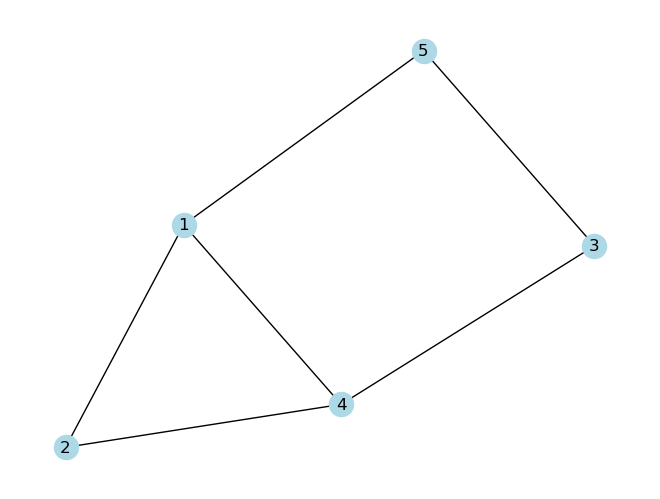

In [6]:
G = nx.Graph()
G.add_nodes_from(['1', '2', '3', '4', '5'])
G.add_edges_from([('1', '2'), 
                  ('1', '4'), 
                  ('1', '5'), 
                  ('2', '4'), 
                  ('3', '4'), 
                  ('3', '5')
                 ])
nx.draw(G, with_labels=True, node_color="lightblue")

In [7]:
nx.degree_assortativity_coefficient(G)

-0.3333333333333304

# Assortativity calculation for categorical node attributes

{'1': Text(-0.5810319895447249, -0.109377185528388, 'male'),
 '2': Text(-0.7860769424664575, 0.7052217003954477, 'female'),
 '3': Text(0.9999999999999999, -0.030852338528147547, 'non-binary'),
 '4': Text(0.09192864629712756, 0.30506733202656033, 'female'),
 '5': Text(0.27518028571405445, -0.470059508365473, 'male')}

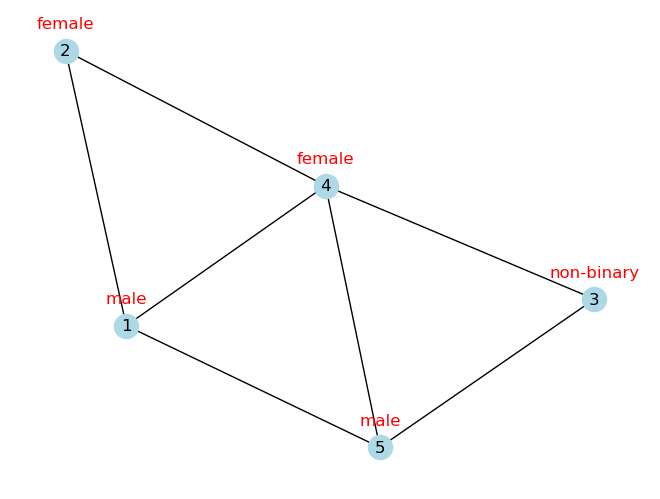

In [9]:
# Create the graph
G = nx.Graph()
G.add_nodes_from(['1', '2', '3', '4', '5'])
G.add_edges_from([('1', '2'), 
                  ('1', '4'), 
                  ('1', '5'), 
                  ('2', '4'), 
                  ('3', '4'), 
                  ('3', '5'),
                  ('4', '5')
                 ])

# Add gender attribute to nodes
gender = {'1': 'male', '2': 'female', '3': 'non-binary', '4': 'female', '5': 'male'}
nx.set_node_attributes(G, gender, 'gender')

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue")

# Add gender labels to nodes with an offset
labels = nx.get_node_attributes(G, 'gender')
offset_pos = {node: (pos[node][0], pos[node][1] + 0.08) for node in pos}  # Adjust the offset as needed
nx.draw_networkx_labels(G, offset_pos, labels, font_size=12, font_color='red')

The unnormalized mixing matrix shows how many edges between the genders exist

In [11]:
mapping = {"non-binary": 0, "female": 1, "male": 2 }
mixing_matrix = nx.attribute_mixing_matrix(G, 'gender', normalized=False, mapping=mapping)
print("Mixing Matrix (unnormalized):")
print(mixing_matrix)

Mixing Matrix (unnormalized):
[[0. 1. 1.]
 [1. 2. 3.]
 [1. 3. 2.]]


For the further calculation it's required to normaliize that matrix. But the unnormalized Matrix is great to follow the steps.

In [13]:
normalized_mixing_matrix = nx.attribute_mixing_matrix(G, 'gender', normalized=True, mapping=mapping)
print("Mixing Matrix (normalized):")
print(normalized_mixing_matrix)

Mixing Matrix (normalized):
[[0.         0.07142857 0.07142857]
 [0.07142857 0.14285714 0.21428571]
 [0.07142857 0.21428571 0.14285714]]


In [14]:
# Compute the assortative index for the gender attribute
assortativity = nx.attribute_assortativity_coefficient(G, 'gender')
print(f"Assortative Index based on gender: {assortativity}")

Assortative Index based on gender: -0.1666666666666668


# Exercise

{'1': Text(-0.005499306044102478, 0.594913052613272, 'low'),
 '2': Text(-1.0, -0.524231797455981, 'low'),
 '3': Text(-0.2654457036794145, -0.1390898961829044, 'medium'),
 '4': Text(0.3662260348356581, 0.17594142681106267, 'high'),
 '5': Text(0.5765389102911687, 0.8765626658519083, 'low'),
 '6': Text(0.3281800645966906, -0.5040954516373582, 'high')}

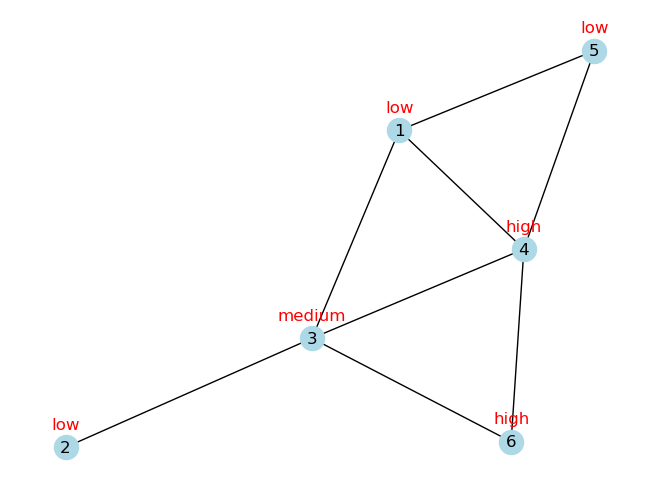

In [30]:
# Create the graph
G_E = nx.Graph()
G_E.add_nodes_from(['1', '2', '3', '4', '5', '6'])
G_E.add_edges_from([('1', '3'), 
                  ('1', '4'), 
                  ('1', '5'), 
                  ('2', '3'), 
                  ('3', '4'), 
                  ('3', '6'),
                  ('4', '5'),
                  ('4', '6')
                 ])

# Add gender attribute to nodes
codinglevel = {'1': 'low', '2': 'low', '3': 'medium', '4': 'high', '5': 'low', '6': 'high'}
nx.set_node_attributes(G_E, codinglevel, 'codinglevel')

# Draw the graph
pos = nx.spring_layout(G_E)
nx.draw(G_E, pos, with_labels=True, node_color="lightblue")

# Add gender labels to nodes with an offset
labels = nx.get_node_attributes(G_E, 'codinglevel')
offset_pos = {node: (pos[node][0], pos[node][1] + 0.08) for node in pos}  # Adjust the offset as needed
nx.draw_networkx_labels(G_E, offset_pos, labels, font_size=12, font_color='red')

## Degree Assortativity

In [33]:
nx.degree_assortativity_coefficient(G_E)

-0.5238095238095238

## Coding Level Assortativity

In [81]:
mapping = {"low": 0, "medium": 1, "high": 2 }
mixing_matrix = nx.attribute_mixing_matrix(G_E, 'codinglevel', normalized=False, mapping=mapping)
print("Mixing Matrix (unnormalized):")
print(mixing_matrix)

Mixing Matrix (unnormalized):
[[2. 2. 2.]
 [2. 0. 2.]
 [2. 2. 2.]]


In [83]:
normalized_mixing_matrix = nx.attribute_mixing_matrix(G_E, 'codinglevel', normalized=True, mapping=mapping)
print("Mixing Matrix (normalized):")
print(normalized_mixing_matrix)

Mixing Matrix (normalized):
[[0.125 0.125 0.125]
 [0.125 0.    0.125]
 [0.125 0.125 0.125]]


In [85]:
print(f"Assortative Index based on coding level: {nx.attribute_assortativity_coefficient(G_E, 'codinglevel')}")

Assortative Index based on coding level: -0.14285714285714285
